In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/hannahburak/Downloads/model_data/full_features.csv',header = 0,encoding='latin-1')
df.head()

,name,industries,ratio_orgs,newsapi_totalResults,root_mean_distance,num_orgs,num_non_orgs,num_titlecase,num_articles,org_at_least_once,num_found,num_industries,ratio_case,newsapi_rawResults,avg_article_length,class
0,apple,consumer electronics;electronics,1.204765,5110,4239.662471,161,196,133,17,17,138,73,0.972421,111829,10910.647060,1
1,lyft,mobile apps;peer to peer;ride sharing;transpor...,0.195098,2156,2102.835687,20,112,78,17,5,79,110,0.985294,5723,10019.470590,1
2,spacex,aerospace,3.449275,1009,2027.324914,190,105,0,10,8,137,17,0.000000,9731,10048.400000,1
3,wework,collaboration;coworking,0.328599,211,2171.503040,71,323,4,12,12,163,75,0.025641,1224,9323.750000,1
4,massachusetts institute of technology,education,0.000000,362,2372.966766,21,0,0,18,18,21,65,0.000000,2280,8074.944444,1


In [3]:
print(df.describe())
print(df.shape)

        ratio_orgs  newsapi_totalResults  root_mean_distance     num_orgs  \
count  1282.000000           1282.000000         1282.000000  1282.000000   
mean      0.353293            701.018721         3445.752111    29.219189   
std       2.186692           3994.650340         3809.701923    87.306871   
min       0.000000              0.000000            0.000000     0.000000   
25%       0.000000              2.000000         1207.196753     0.000000   
50%       0.004667             17.000000         2680.589291     3.000000   
75%       0.153461             93.000000         4504.161967    20.000000   
max      50.000000          74320.000000        41288.132080  1832.000000   

       num_non_orgs  num_titlecase  num_articles  org_at_least_once  \
count   1282.000000    1282.000000   1282.000000        1282.000000   
mean      79.313573      39.868955      9.133385           3.853354   
std      152.723988      64.561597      7.146629           5.076805   
min        0.000000   

# Logistic Regression: Normalization

In [5]:
df_norm = preprocessing.normalize(df.loc[:,'ratio_orgs':'avg_article_length'])
df_target = df['class']
x_train, x_test, y_train, y_test = train_test_split(df_norm, df_target, test_size=0.20, random_state=0)

In [23]:
log = lm.LogisticRegression(penalty = 'l2',C = 1.0)
log.fit(x_train,y_train)

y_predict_train = log.predict(x_train) 
print('Train Accuracy:',metrics.accuracy_score(y_train,y_predict_train))

Train Accuracy: 0.7990243902439025


In [37]:
y_predict_test = log.predict(x_test)
print('Test Accuracy:',metrics.accuracy_score(y_test,y_predict_test))
print('Confusion Matrix:','\n',metrics.confusion_matrix(y_test,y_predict_test,labels = [0,1]))

table = pd.DataFrame(np.round(log.coef_,3),columns = ['ratio_orgs', 'newsapi_totalResults',
       'root_mean_distance', 'num_orgs', 'num_non_orgs', 'num_titlecase',
       'num_articles', 'org_at_least_once', 'num_found', 'num_industries',
       'ratio_case', 'newsapi_rawResults', 'avg_article_length'])

print('Coefficients:')
print(table)

Test Accuracy: 0.8132295719844358
Confusion Matrix: 
 [[ 29  24]
 [ 24 180]]
Coefficients:
   ratio_orgs  newsapi_totalResults  root_mean_distance  num_orgs  \
0       0.003                  1.99               1.164     0.193   

   num_non_orgs  num_titlecase  num_articles  org_at_least_once  num_found  \
0         0.268          0.191         0.024               0.02      0.258   

   num_industries  ratio_case  newsapi_rawResults  avg_article_length  
0           0.397       0.002               -0.09               1.997  


### Setting C

In [14]:
x_train_sub, x_valid_sub, y_train_sub, y_valid_sub = train_test_split(x_train, y_train, test_size=0.20, random_state=0)


Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8146341463414634
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512


Text(0,0.5,'Validation Accuracy')

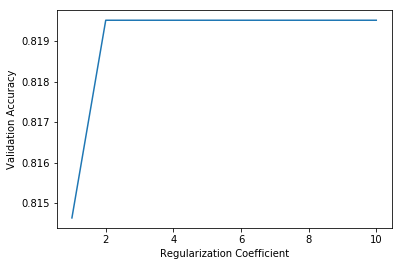

In [15]:
#skf = StratifiedKFold(n_splits=10) #Use 10 fold cross-validation

accuracy = []
    
for c in range(1,11): 
    log = lm.LogisticRegression(penalty = 'l2',C = c)
    
    log.fit(x_train_sub,y_train_sub)
    y_predict_train = log.predict(x_train_sub) 
    print('Train Accuracy:',metrics.accuracy_score(y_train_sub,y_predict_train))

    y_predict_valid = log.predict(x_valid_sub)
    print('Validation Accuracy:',metrics.accuracy_score(y_valid_sub,y_predict_valid))
    accuracy.append(metrics.accuracy_score(y_valid_sub,y_predict_valid))

plt.plot(np.linspace(1,10,10),accuracy)
plt.xlabel('Regularization Coefficient')
plt.ylabel('Validation Accuracy')

Conclusion: C = 2.0 optimal.

### Setting other parameters

In [17]:
#Solver = newton-cg
log = lm.LogisticRegression(penalty = 'l2',C = 2, solver = 'newton-cg', multi_class = 'multinomial')

log.fit(x_train_sub,y_train_sub)

y_predict_train = log.predict(x_train_sub) 
print('Train Accuracy:',metrics.accuracy_score(y_train_sub,y_predict_train))

y_predict_valid = log.predict(x_valid_sub)
print('Validation Accuracy:',metrics.accuracy_score(y_valid_sub,y_predict_valid))

#Solver = lbfgs
log = lm.LogisticRegression(penalty = 'l2',C = 2, solver = 'lbfgs', multi_class = 'multinomial')

log.fit(x_train_sub,y_train_sub)

y_predict_train = log.predict(x_train_sub) 
print('Train Accuracy:',metrics.accuracy_score(y_train_sub,y_predict_train))

y_predict_valid = log.predict(x_valid_sub)
print('Validation Accuracy:',metrics.accuracy_score(y_valid_sub,y_predict_valid))

#Solver = sag
log = lm.LogisticRegression(penalty = 'l2',C = 2, solver = 'sag', multi_class = 'multinomial')

log.fit(x_train_sub,y_train_sub)

y_predict_train = log.predict(x_train_sub) 
print('Train Accuracy:',metrics.accuracy_score(y_train_sub,y_predict_train))

y_predict_valid = log.predict(x_valid_sub)
print('Validation Accuracy:',metrics.accuracy_score(y_valid_sub,y_predict_valid))


Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512


In [18]:
#Solver = newton-cg
log = lm.LogisticRegression(penalty = 'l2',C = 2, solver = 'newton-cg', multi_class = 'ovr')

log.fit(x_train_sub,y_train_sub)

y_predict_train = log.predict(x_train_sub) 
print('Train Accuracy:',metrics.accuracy_score(y_train_sub,y_predict_train))

y_predict_valid = log.predict(x_valid_sub)
print('Validation Accuracy:',metrics.accuracy_score(y_valid_sub,y_predict_valid))

#Solver = lbfgs
log = lm.LogisticRegression(penalty = 'l2',C = 2, solver = 'lbfgs', multi_class = 'ovr')

log.fit(x_train_sub,y_train_sub)

y_predict_train = log.predict(x_train_sub) 
print('Train Accuracy:',metrics.accuracy_score(y_train_sub,y_predict_train))

y_predict_valid = log.predict(x_valid_sub)
print('Validation Accuracy:',metrics.accuracy_score(y_valid_sub,y_predict_valid))

#Solver = sag
log = lm.LogisticRegression(penalty = 'l2',C = 2, solver = 'sag', multi_class = 'ovr')

log.fit(x_train_sub,y_train_sub)

y_predict_train = log.predict(x_train_sub) 
print('Train Accuracy:',metrics.accuracy_score(y_train_sub,y_predict_train))

y_predict_valid = log.predict(x_valid_sub)
print('Validation Accuracy:',metrics.accuracy_score(y_valid_sub,y_predict_valid))


Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512


In [19]:
#Solver = newton-cg
log = lm.LogisticRegression(penalty = 'l1',C = 2, solver = 'liblinear', multi_class = 'ovr')

log.fit(x_train_sub,y_train_sub)

y_predict_train = log.predict(x_train_sub) 
print('Train Accuracy:',metrics.accuracy_score(y_train_sub,y_predict_train))

y_predict_valid = log.predict(x_valid_sub)
print('Validation Accuracy:',metrics.accuracy_score(y_valid_sub,y_predict_valid))

#Solver = lbfgs
log = lm.LogisticRegression(penalty = 'l1',C = 2, solver = 'saga', multi_class = 'ovr')

log.fit(x_train_sub,y_train_sub)

y_predict_train = log.predict(x_train_sub) 
print('Train Accuracy:',metrics.accuracy_score(y_train_sub,y_predict_train))

y_predict_valid = log.predict(x_valid_sub)
print('Validation Accuracy:',metrics.accuracy_score(y_valid_sub,y_predict_valid))

Train Accuracy: 0.7963414634146342
Validation Accuracy: 0.8195121951219512
Train Accuracy: 0.7939024390243903
Validation Accuracy: 0.8195121951219512


### Try dropping unimportant features

In [22]:
df_drop = np.delete(x_train,0,1)
df_drop = np.delete(df_drop,10,1)
x_train_drop, x_valid_drop, y_train_drop, y_valid_drop = train_test_split(x_train, y_train, test_size=0.20, random_state=0)

In [23]:
log = lm.LogisticRegression(penalty = 'l2',C = 2.0)

log.fit(x_train_drop,y_train_drop)

y_predict_train = log.predict(x_train_drop) 
print('Train Accuracy:',metrics.accuracy_score(y_train_drop,y_predict_train))

y_predict_valid = log.predict(x_valid_sub)
print('Validation Accuracy:',metrics.accuracy_score(y_valid_drop,y_predict_valid))

Train Accuracy: 0.7951219512195122
Validation Accuracy: 0.8195121951219512


### The model we're sticking with

In [25]:
log = lm.LogisticRegression(penalty = 'l2',C = 2.0)
log.fit(x_train,y_train)

y_predict_test = log.predict(x_test)
print('Test Accuracy:',metrics.accuracy_score(y_test,y_predict_test))
print('Confusion Matrix:','\n',metrics.confusion_matrix(y_test,y_predict_test,labels = [0,1]))

table = pd.DataFrame(np.round(log.coef_,3),columns = ['ratio_orgs', 'newsapi_totalResults',
       'root_mean_distance', 'num_orgs', 'num_non_orgs', 'num_titlecase',
       'num_articles', 'org_at_least_once', 'num_found', 'num_industries',
       'ratio_case', 'newsapi_rawResults', 'avg_article_length'])

print('Coefficients:')
print(table)

Test Accuracy: 0.8171206225680934
Confusion Matrix: 
 [[ 30  23]
 [ 24 180]]
Coefficients:
   ratio_orgs  newsapi_totalResults  root_mean_distance  num_orgs  \
0       0.005                 2.689               1.391     0.364   

   num_non_orgs  num_titlecase  num_articles  org_at_least_once  num_found  \
0         0.488          0.359         0.044              0.039      0.484   

   num_industries  ratio_case  newsapi_rawResults  avg_article_length  
0           0.743       0.003              -0.068                 2.0  


# Logistic Regression: Non-normalized

Just checking on something I read--these decreased model performance. Disregard and stick with normalization.

In [38]:
df_sub = df.loc[:,'ratio_orgs':'avg_article_length']
x_train, x_test, y_train, y_test = train_test_split(df_sub, df_target, test_size=0.20, random_state=0)

In [39]:
log = lm.LogisticRegression(penalty = 'l2',C = 1.0)
log.fit(x_train,y_train)

y_predict_train = log.predict(x_train) 
print('Train Accuracy:',metrics.accuracy_score(y_train,y_predict_train))

Train Accuracy: 0.7736585365853659


In [40]:
y_predict_test = log.predict(x_test)
print('Test Accuracy:',metrics.accuracy_score(y_test,y_predict_test))
print('Confusion Matrix:','\n',metrics.confusion_matrix(y_test,y_predict_test,labels = [0,1]))

table = pd.DataFrame(np.round(log.coef_,3),columns = ['ratio_orgs', 'newsapi_totalResults',
       'root_mean_distance', 'num_orgs', 'num_non_orgs', 'num_titlecase',
       'num_articles', 'org_at_least_once', 'num_found', 'num_industries',
       'ratio_case', 'newsapi_rawResults', 'avg_article_length'])

print('Coefficients:')
print(table)

Test Accuracy: 0.7859922178988327
Confusion Matrix: 
 [[  0  53]
 [  2 202]]
Coefficients:
   ratio_orgs  newsapi_totalResults  root_mean_distance  num_orgs  \
0        0.43                  -0.0                -0.0    -0.004   

   num_non_orgs  num_titlecase  num_articles  org_at_least_once  num_found  \
0        -0.004         -0.005        -0.042              0.097      0.015   

   num_industries  ratio_case  newsapi_rawResults  avg_article_length  
0            0.01       1.186                 0.0                 0.0  
